**Análise qualidade da água**
*Implementação da lógica Fuzzy*

Desenvolvido por: Patricia Correia de L 
Santos 

09/2022

Ciência de Dados - FATEC SDP - Santana de Parnaíba

Baseado no artigo: https://www.fc.unesp.br/Home/Departamentos/Matematica/revistacqd2228/v14a09-sistema-baseado-em-regras-fuzzy.pdf


Encontrei outras opções de bibliotecas que não são tão documentadas quando a Scikit Fuzzy como: 

FuzzyWuzzy: https://pypi.org/project/fuzzywuzzy/

Simpful: https://pypi.org/project/simpful/

In [7]:
!pip install scikit-fuzzy
!pip install numpy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [8]:
ph = ctrl.Antecedent(np.arange(-6, 14.5, 1), 'ph')
cor_aparente = ctrl.Antecedent(np.arange(-6, 34, 2), 'cor_aparente')
turbidez = ctrl.Antecedent(np.arange(-1.5, 11, 1), 'turbidez')
potabilidade = ctrl.Consequent(np.arange(1, 10, 0.5), 'potabilidade')
potabilidade.automf(names=['inadequado_baixo', 'adequado','bom','inadequado'])

In [9]:
ph['inadequado_bbaixo'] = fuzz.trimf(ph.universe, [8, 11, 14.5])
ph['adequado'] = fuzz.trapmf(ph.universe, [5, 6, 8.5, 9.5])
ph['bom'] = fuzz.trapmf(ph.universe, [5.5, 6.5, 8, 8.5])
ph['inadequado'] = fuzz.trapmf(ph.universe, [9, 9.5, 14, 14.5])

cor_aparente['boa'] = fuzz.trapmf(cor_aparente.universe, [-6, 3, 3, 6])
cor_aparente['adequada'] = fuzz.trapmf(cor_aparente.universe, [3, 5, 15, 17])
cor_aparente['inadequada'] = fuzz.trapmf(cor_aparente.universe, [13, 17, 30, 34])

turbidez['boa'] = fuzz.trapmf(turbidez.universe, [-1.5, -0.5, 0.5, 1.5])
turbidez['adequada'] = fuzz.trapmf(turbidez.universe, [0.5, 1.5, 4.5, 5.5])
turbidez['inadequada'] = fuzz.trapmf(turbidez.universe, [4.5, 5.5, 10, 11])

In [10]:
r1 = ctrl.Rule(ph['bom'] & turbidez['adequada'] & cor_aparente['boa']|ph['bom'] & turbidez['adequada'] |ph['bom'] &cor_aparente['boa'],  potabilidade['bom'])
r2 = ctrl.Rule(ph['adequado'] & cor_aparente['inadequada'] | ph['adequado'] & turbidez ['adequada'] , potabilidade['adequado'])
r3 = ctrl.Rule(ph['inadequado_bbaixo'] & cor_aparente['inadequada'], potabilidade['inadequado'])


In [11]:
potabilidade_ctrl = ctrl.ControlSystem([r1, r2, r3])
potabilidade_simu = ctrl.ControlSystemSimulation(potabilidade_ctrl)
#ph arange(-6, 14.5, 1)
#cor_aparentearange(-6, 34, 2)
#turbidez arange(-1.5, 11, 1)
potabilidade_simu.input['ph'] = 7
potabilidade_simu.input['cor_aparente'] = 15
potabilidade_simu.input['turbidez'] = 9

potabilidade_simu.compute()
print(potabilidade_simu.output['potabilidade'])

3.8466003316749586


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


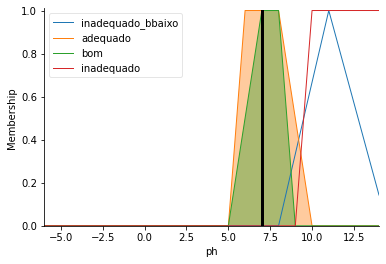

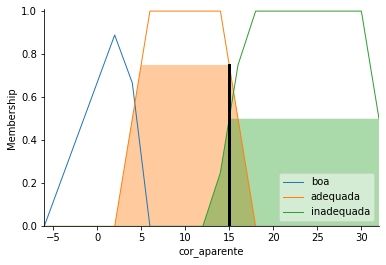

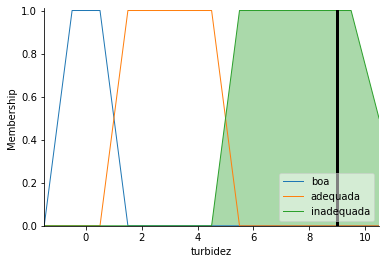

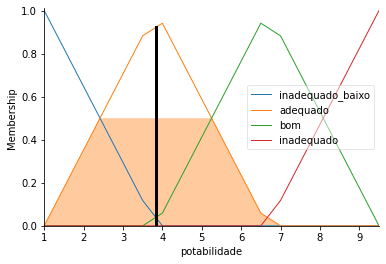

In [14]:
ph.view(sim=potabilidade_simu)
cor_aparente.view(sim=potabilidade_simu)
turbidez.view(sim=potabilidade_simu)
potabilidade.view(sim=potabilidade_simu)